# Riiid Project: Minimally Viable Product (MVP)

Daniella Bojado

## About the Project

- Build a better and more equitable model for education in a post-COVID-19 world.

## Goals

- Create algorithms for "Knowledge Tracing," the modeling of student knowledge over time. 
- Accurately predict how students will perform on future interactions. 

# Imports

In [1]:
# General Imports 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

# Train Validate Test
from sklearn.model_selection import train_test_split

# Modeling Imports
from sklearn.cluster import KMeans

# Acquire and Prepare Files
import acquire 
import prepare

# Warnings 
import warnings
warnings.filterwarnings("ignore")

# Acquire

In [2]:
df_train = pd.read_csv('train.csv')
df_lectures = pd.read_csv('lectures.csv')
df_questions = pd.read_csv('questions.csv') 

In [2]:
df_sample = pd.read_csv('sampled_trainset.csv')

In [4]:
# Train Data
df_train.head() 

,row_id,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,0,115,5692,0,1,3,1,NaN,NaN
1,1,56943,115,5716,0,2,2,1,37000.0,False
2,2,118363,115,128,0,0,0,1,55000.0,False
3,3,131167,115,7860,0,3,0,1,19000.0,False
4,4,137965,115,7922,0,4,1,1,11000.0,False


In [5]:
df_train = df_train.drop(['row_id', 'content_type_id','task_container_id','prior_question_had_explanation'], axis = 1)

In [6]:
df_train.shape

(101230332, 6)

In [7]:
# Lectures data
df_lectures.head()

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question


In [8]:
df_lectures.shape

(418, 4)

In [9]:
# Questions data
df_questions.head()

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38


In [10]:
df_questions.shape

(13523, 5)

# Prepare

In [13]:
# Train

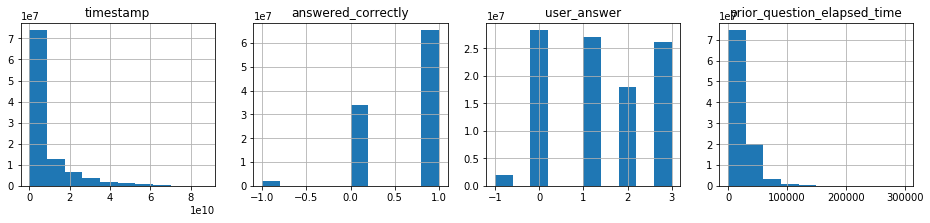

In [12]:
# Plot data to identify outliers and distributions
plt.figure(figsize=(16, 3))
for i, col in enumerate(['timestamp', 'answered_correctly', 'user_answer', 'prior_question_elapsed_time']):  
    plot_number = i + 1
    series = df_[col]  
    plt.subplot(1,4, plot_number)
    plt.title(col)
    series.hist()

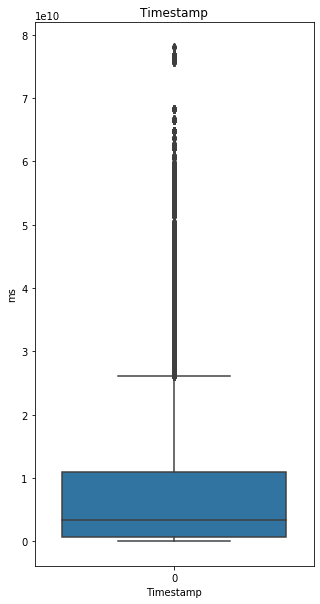

In [25]:
plt.figure(figsize=(5,10))
sns.boxplot(data=df_1000.timestamp)
plt.title('Timestamp')
plt.xlabel('Timestamp') 
plt.ylabel('ms')
plt.show()

# Explore

In [2]:
df = acquire.get_riiid_data()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26248100 entries, 0 to 26248099
Data columns (total 18 columns):
 #   Column                          Dtype  
---  ------                          -----  
 0   timestamp                       int64  
 1   user_id                         int64  
 2   content_id                      int64  
 3   content_type_id                 int64  
 4   task_container_id               int64  
 5   user_answer                     int64  
 6   answered_correctly              int64  
 7   prior_question_elapsed_time     float64
 8   prior_question_had_explanation  object 
 9   lecture_id                      int64  
 10  tag                             int64  
 11  lecture_part                    int64  
 12  type_of                         object 
 13  question_id                     int64  
 14  bundle_id                       int64  
 15  correct_answer                  float64
 16  question_part                   int64  
 17  tags                     

In [17]:
df.shape

(26248100, 18)

In [18]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
timestamp,26248100.0,7.569140e+09,1.139483e+10,0.0,5.260336e+08,2.623139e+09,9.690717e+09,8.742577e+10
user_id,26248100.0,1.072941e+09,6.237179e+08,24600.0,5.304664e+08,1.060838e+09,1.619868e+09,2.147471e+09
content_id,26248100.0,5.201949e+03,3.864901e+03,0.0,2.053000e+03,5.005000e+03,7.395000e+03,3.273600e+04
content_type_id,26248100.0,1.935287e-02,1.377619e-01,0.0,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
task_container_id,26248100.0,9.137263e+02,1.368444e+03,0.0,1.070000e+02,3.880000e+02,1.108000e+03,9.999000e+03
user_answer,26248100.0,1.375915e+00,1.192890e+00,-1.0,0.000000e+00,1.000000e+00,3.000000e+00,3.000000e+00
answered_correctly,26248100.0,6.267232e-01,5.221561e-01,-1.0,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
prior_question_elapsed_time,26248100.0,inf,NaN,0.0,1.500000e+04,2.100000e+04,2.900000e+04,inf
lecture_id,26248100.0,3.939506e+02,2.746245e+03,0.0,0.000000e+00,0.000000e+00,0.000000e+00,3.273600e+04
tag,26248100.0,2.786409e-01,1.447568e+01,-128.0,0.000000e+00,0.000000e+00,0.000000e+00,1.270000e+02


In [9]:
df.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,24600,7900,0,0,0,1,0.0,0,0,0,0,0,7900,7900,0.0,1,131 93 81
1,25379,24600,7876,0,1,2,0,24000.0,False,0,0,0,0,7876,7876,3.0,1,10 94 92
2,50137,24600,175,0,2,2,1,23000.0,False,0,0,0,0,175,175,2.0,1,9 10 92
3,70181,24600,1278,0,3,3,1,22000.0,False,0,0,0,0,1278,1278,3.0,2,143 140 81 29
4,148601,24600,2064,0,4,2,0,18000.0,False,0,0,0,0,2064,2063,1.0,3,157 92 29


In [27]:
for col in df:
    if df[col].dtypes == 'int64':
        print(f'{col} has {df[col].nunique()} unique values.')

timestamp has 19429512 unique values.
user_id has 100000 unique values.
content_id has 13776 unique values.
content_type_id has 2 unique values.
task_container_id has 10000 unique values.
user_answer has 5 unique values.
answered_correctly has 3 unique values.
lecture_id has 416 unique values.
tag has 151 unique values.
lecture_part has 8 unique values.
question_id has 13519 unique values.
bundle_id has 9764 unique values.
question_part has 8 unique values.


# Barplots

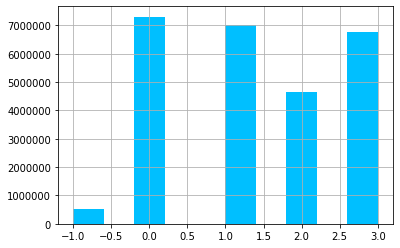

In [26]:
# User answer value count
df['user_answer'].hist(color='deepskyblue') 
plt.show()

In [24]:
df.user_answer.value_counts()

 0    7308443
 1    7004275
 3    6764042
 2    4663364
-1     507976
Name: user_answer, dtype: int64

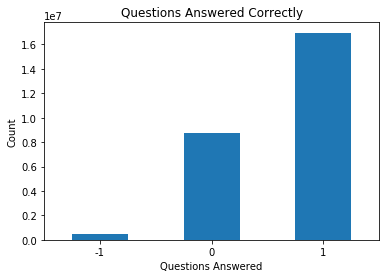

In [88]:
# Answered correctly
df.answered_correctly.value_counts().sort_index().plot.bar()
answer_correctly = df.answered_correctly.mean()
plt.title("Questions Answered Correctly")
plt.xlabel('Questions Answered')
plt.ylabel('Count')
plt.xticks(rotation=0) 
plt.show()

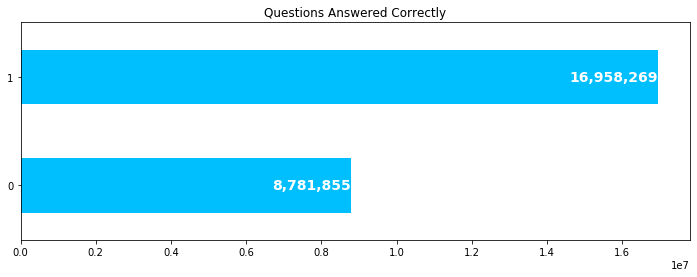

In [50]:
# Answered correctly
all_answers = df[df.answered_correctly != -1].answered_correctly.value_counts(ascending=True)
fig = plt.figure(figsize=(12,4))
all_answers.plot.barh(color="deepskyblue")
for i, v in zip(correct.index, correct.values):
    plt.text(v, i, '{:,}'.format(v), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Questions Answered Correctly")
plt.xticks(rotation=0)
plt.show()

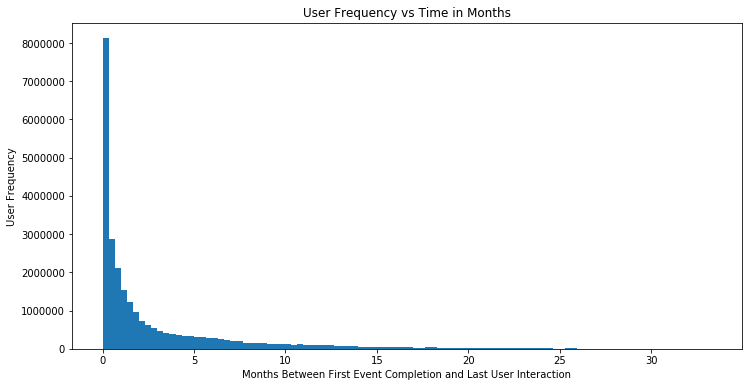

In [39]:
# User_id vs Timestamp
# Had to convert time from in milliseconds to months
ts = df['timestamp']/(31536000000/12)
fig = plt.figure(figsize=(12,6))
ts.plot.hist(bins=100)
plt.title("User Frequency vs Time in Months")
plt.xticks(rotation=0)
plt.xlabel("Months Between First Event Completion and Last User Interaction")
plt.ylabel("User Frequency")
plt.show()

# Scatterplots

In [63]:
user_percent = df[df.answered_correctly != -1].groupby('user_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'The most number of questions answered by a user is {user_percent.Answers.max()}')

The most number of questions answered by a user is 16640


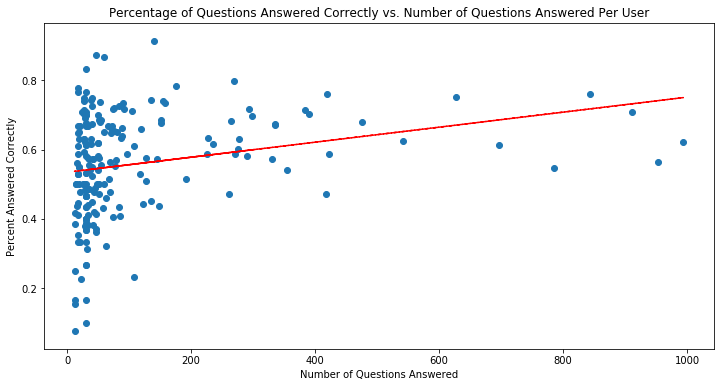

In [62]:
user_percent = user_percent.query('Answers <= 1000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = user_percent.Answers
y = user_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Percentage of Questions Answered Correctly vs. Number of Questions Answered Per User")
plt.xlabel("Number of Questions Answered")
plt.ylabel("Percent Answered Correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

In [57]:
content_percent = df[df.answered_correctly != -1].groupby('content_id')['answered_correctly'].agg(Mean='mean', Answers='count')
print(f'The highest number of questions asked by content_id is {content_percent.Answers.max()}.')
print(f'Of {len(content_percent)} content_ids, {len(content_percent[content_percent.Answers > 25000])} content_ids had more than 25,000 questions asked.')

The highest number of questions asked by content_id is 54795.
Of 13519 content_ids, 37 content_ids had more than 25,000 questions asked.


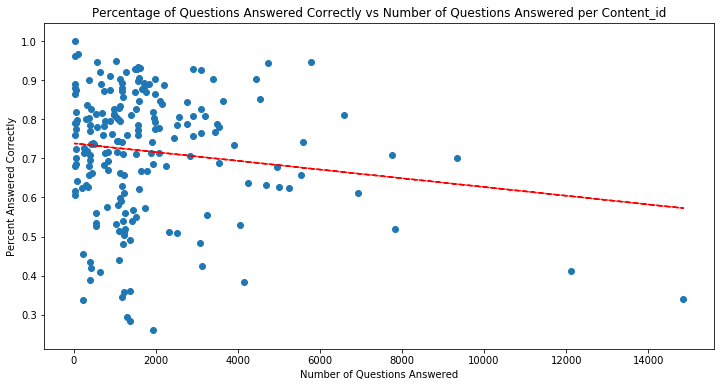

In [64]:
content_percent = content_percent.query('Answers <= 25000').sample(n=200, random_state=1)

fig = plt.figure(figsize=(12,6))
x = content_percent.Answers
y = content_percent.Mean
plt.scatter(x, y, marker='o')
plt.title("Percentage of Questions Answered Correctly vs Number of Questions Answered per Content_id")
plt.xticks(rotation=0)
plt.xlabel("Number of Questions Answered")
plt.ylabel("Percent Answered Correctly")
z = np.polyfit(x, y, 1)
p = np.poly1d(z)
plt.plot(x,p(x),"r--")

plt.show()

prior_question_had_explanation
0           99720
False     2372041
True     23268363
Name: (answered_correctly, count), dtype: int64


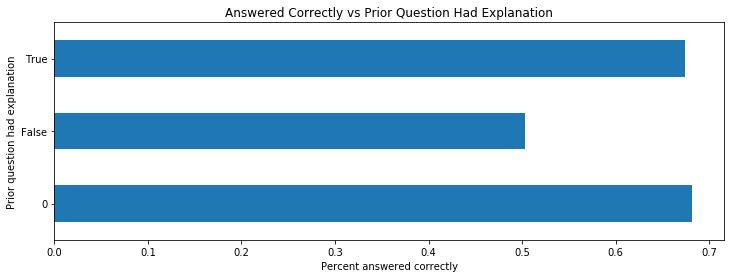

In [66]:
pq = df[df.answered_correctly != -1].groupby(['prior_question_had_explanation']).agg({'answered_correctly': ['mean', 'count']})
#pq.index = pq.index.astype(str)
print(pq.iloc[:,1])
pq = pq.iloc[:,0]

fig = plt.figure(figsize=(12,4))
pq.plot.barh()
# for i, v in zip(pq.index, pq.values):
#     plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')
plt.title("Answered Correctly vs Prior Question Had Explanation")
plt.xlabel("Percent answered correctly")
plt.ylabel("Prior question had explanation")
plt.xticks(rotation=0)
plt.show()

False    61761
True     38239
Name: Watches_lecture, dtype: int64


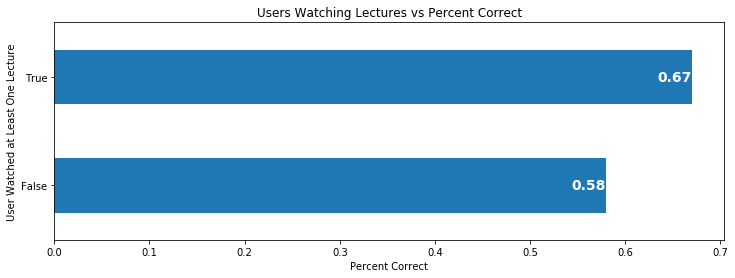

In [82]:
user_lect = df.groupby(["user_id", "answered_correctly"]).size().unstack()
user_lect.columns = ['Lecture', 'Wrong', 'Right']
user_lect['Lecture'] = user_lect['Lecture'].fillna(0)
user_lect = user_lect.astype('Int64')
user_lect['Watches_lecture'] = np.where(user_lect.Lecture > 0, True, False)

watches_l = user_lect.groupby("Watches_lecture").agg({'Wrong': ['sum'], 'Right': ['sum']})
print(user_lect.Watches_lecture.value_counts())

watches_l['Percent_correct'] = watches_l.Right/(watches_l.Right + watches_l.Wrong)

watches_l = watches_l.iloc[:,2]

fig = plt.figure(figsize=(12,4))
watches_l.plot.barh()
for i, v in zip(watches_l.index, watches_l.values):
    plt.text(v, i, round(v,2), color='white', fontweight='bold', fontsize=14, ha='right', va='center')

plt.title("Users Watching Lectures vs Percent Correct")
plt.xlabel("Percent Correct")
plt.ylabel("User Watched at Least One Lecture")
plt.xticks(rotation=0)
plt.show()

# Crosstab

In [107]:
## Crosstab (Discrete x Discrete)
pd.crosstab(df.user_answer, df.answered_correctly, margins=True)

answered_correctly,-1,0,1,All
user_answer,,,,
-1,507976,0,0,507976
0,0,2490342,4818101,7308443
1,0,2458720,4545555,7004275
2,0,1535125,3128239,4663364
3,0,2297668,4466374,6764042
All,507976,8781855,16958269,26248100


In [3]:
df_sample.head()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89


In [4]:
# There 3600000 ms in an hour
df_sample['ts_in_hours'] = df_sample['timestamp']/(3600000)
df_sample 

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags,ts_in_hours
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115,0.000000
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173,0.012589
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1,0.020368
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55,0.026515
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89,0.036430
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411512,568427,2145492661,172,0,26,1,1,21000.0,False,NaN,NaN,NaN,NaN,172.0,172.0,1.0,1.0,10 164 81,0.155733
411513,593283,2145492661,7898,0,27,3,0,18000.0,False,NaN,NaN,NaN,NaN,7898.0,7898.0,2.0,1.0,131 99 29,0.162543
411514,614284,2145492661,175,0,28,0,0,22000.0,False,NaN,NaN,NaN,NaN,175.0,175.0,2.0,1.0,9 10 92,0.168297
411515,632206,2145492661,100,0,29,2,0,18000.0,False,100.0,70.0,1.0,concept,100.0,100.0,0.0,1.0,131 5 81,0.173207


In [15]:
# There 86400000 ms in an hour
df_sample['ts_in_days'] = df_sample['timestamp']/(86400000)
df_sample

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,lecture_id,tag,lecture_part,type_of,question_id,bundle_id,correct_answer,question_part,tags,ts_in_hours,ts_in_days
0,0,1864702,5720,0,0,1,1,NaN,NaN,NaN,NaN,NaN,NaN,5720.0,5720.0,1.0,5.0,115,0.000000,0.000000
1,45951,1864702,5204,0,1,1,0,inf,False,NaN,NaN,NaN,NaN,5204.0,5204.0,3.0,5.0,173,0.012589,0.000532
2,74342,1864702,4094,0,2,1,1,43000.0,False,NaN,NaN,NaN,NaN,4094.0,4094.0,1.0,5.0,1,0.020368,0.000860
3,96778,1864702,9699,0,3,0,1,25000.0,False,NaN,NaN,NaN,NaN,9699.0,9699.0,0.0,5.0,55,0.026515,0.001120
4,132969,1864702,5889,0,4,2,0,19000.0,False,NaN,NaN,NaN,NaN,5889.0,5889.0,3.0,5.0,89,0.036430,0.001539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
411512,568427,2145492661,172,0,26,1,1,21000.0,False,NaN,NaN,NaN,NaN,172.0,172.0,1.0,1.0,10 164 81,0.155733,0.006579
411513,593283,2145492661,7898,0,27,3,0,18000.0,False,NaN,NaN,NaN,NaN,7898.0,7898.0,2.0,1.0,131 99 29,0.162543,0.006867
411514,614284,2145492661,175,0,28,0,0,22000.0,False,NaN,NaN,NaN,NaN,175.0,175.0,2.0,1.0,9 10 92,0.168297,0.007110
411515,632206,2145492661,100,0,29,2,0,18000.0,False,100.0,70.0,1.0,concept,100.0,100.0,0.0,1.0,131 5 81,0.173207,0.007317


In [16]:
df_sample.describe()

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,lecture_id,tag,lecture_part,question_id,bundle_id,correct_answer,question_part,ts_in_hours,ts_in_days
count,4.115170e+05,4.115170e+05,411517.000000,411517.000000,411517.000000,411517.000000,411517.000000,401384.0,13501.000000,13501.000000,13501.000000,406579.000000,406579.000000,406579.000000,406579.000000,411517.000000,411517.000000
mean,5.868159e+09,1.083021e+09,5142.540636,0.019780,775.541343,1.375707,0.618276,inf,12270.451300,7.888897,4.194504,4923.058065,4922.630239,1.439415,4.084724,1607.714802,67.918507
std,9.156527e+09,6.700516e+08,3810.084394,0.139245,1240.923367,1.191337,0.524950,NaN,9500.166623,80.663944,1.839912,3204.849006,3204.749562,1.151768,1.671508,2508.637571,105.978323
min,0.000000e+00,1.864702e+06,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.0,89.000000,-128.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,3.612504e+08,4.844761e+08,2065.000000,0.000000,83.000000,0.000000,0.000000,16000.0,4187.000000,-85.000000,2.000000,2064.000000,2063.000000,0.000000,2.000000,98.972711,4.181139
50%,1.776387e+09,1.059277e+09,4982.000000,0.000000,300.000000,1.000000,1.000000,21000.0,9896.000000,33.000000,5.000000,4851.000000,4851.000000,1.000000,5.000000,486.681270,20.560031
75%,7.594605e+09,1.685634e+09,7216.000000,0.000000,896.000000,3.000000,1.000000,30000.0,19223.000000,71.000000,5.000000,6980.000000,6976.000000,3.000000,5.000000,2080.713705,87.900521
max,6.212613e+10,2.145493e+09,32736.000000,1.000000,9176.000000,3.000000,1.000000,inf,32736.000000,127.000000,7.000000,13522.000000,13522.000000,3.000000,7.000000,17020.858831,719.052485


In [31]:
df_sample['quantiles'] = pd.qcut(df_sample['ts_in_days'],
                            q=[0,.25,.5,.75,1],
                            labels=False,
                            precision=0)
df_sample.quantiles.value_counts()

0    102880
3    102879
2    102879
1    102879
Name: quantiles, dtype: int64

## Swarmplot (Discrete x Continuous)

In [46]:
swarm_df = df_sample.sample(frac=.001, replace=False, random_state=123)

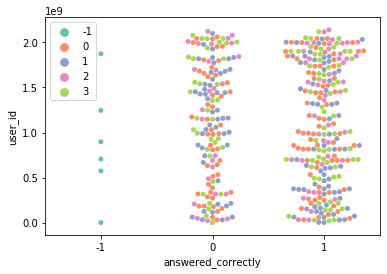

In [47]:
sns.swarmplot(x="answered_correctly", y="user_id", data=swarm_df, hue="user_answer", palette="Set2")
plt.legend()

In [ ]:
# User_id vs Task_container_id
# User_id vs Content_id
# User_id vs Answered_Correctly 
# Part vs Tags
# Part vs Type of 

In [ ]:
sns.relplot(x="user_id'", y="ts_in_days", hue="answered_correctly", data=df_sample, height=6, aspect=1.6)
plt.xlim(0, 175)

# Violinplot (Discrete x Continuous)

In [ ]:
features = ["user_answer"]
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 6))

for i, feature in enumerate(features):
    sns.violinplot(
        feature,
        "ts_in_days",
        hue="answered_correctly",
        data=df_sample,
        split=True,
        ax=ax[i],
        palette=["blue", "red"],
    )

In [ ]:
# Rates feature importance 
import lightgbm as lgb
model = lgb.df(
                    {'objective': 'binary'}, 
                    lgb_train,
                    valid_sets=[lgb_train, lgb_valid],
                    verbose_eval=100,
                    num_boost_round=10000,
                    early_stopping_rounds=10
                )
print('auc:', roc_auc_score(y_va, model.predict(valid[FEATS])))
_ = lgb.plot_importance(model)

# Model

# Conclusions

### Future Investigations

### Resources

- https://www.kaggle.com/c/riiid-test-answer-prediction/overview/description
- https://www.kaggle.com/isaienkov/riiid-answer-correctness-prediction-eda-modeling

### Contact Us

Dani Bojado
- daniella.bojado@gmail.com 

Samuel Davila
- samuelrdavila@gmail.com

Yongliang Shi
- yongliang.michael.shi@gmail.com

Christopher Logan Ortiz
- christopher.logan.ortiz@gmail.com